# Requirements

In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    style="whitegrid", 
    font_scale = 2, 
    rc={'figure.figsize':(18,9)}
)

# Visualize

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


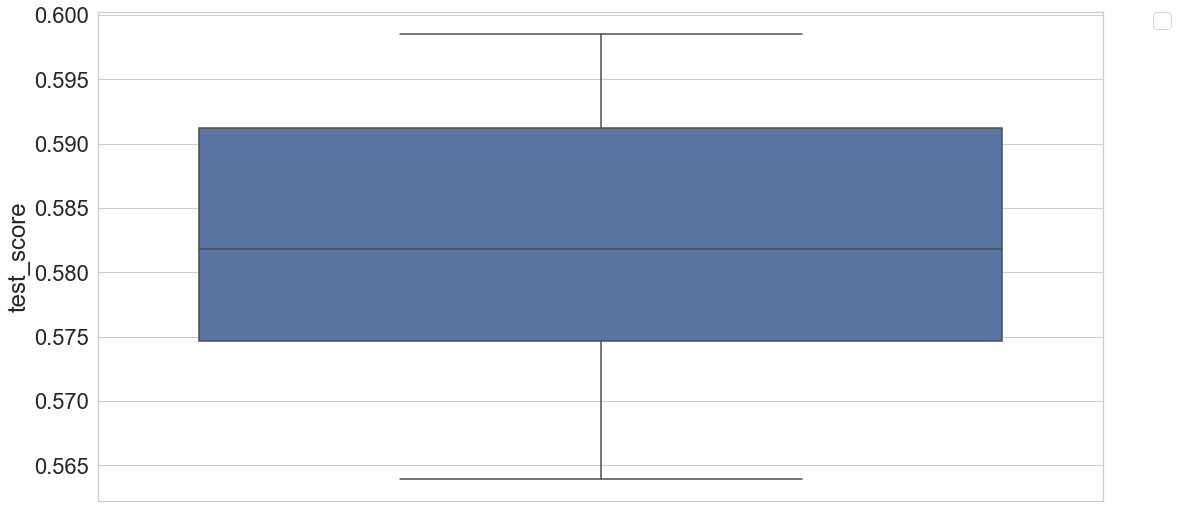

In [10]:
data = pd.read_csv("../logs/221201.235648-experiment-mlp-all/runs.csv")

sns.boxplot(y="test_score",
            data=data)
# sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

# Confusion matrix

In [3]:
path = "../logs/221201.235648-experiment-mlp-all/"

true_labels = []
pred_labels = []
for k in range(5):
    for trial in range(10):
        trial_path = path + f"k_{k}/{trial:04d}/confusion_matrix_data.npz"
        result = np.load(trial_path, allow_pickle=True)
        true_labels.append(result['true_labels'])
        pred_labels.append(result['predicted_labels'])


true_labels = np.hstack(true_labels)
pred_labels = np.hstack(pred_labels)

print(true_labels.shape)
print(pred_labels.shape)

(39110,)
(39110,)


In [10]:
print(pred_labels.shape)

b = np.zeros((pred_labels.shape[0], pred_labels.max() + 1))
b[np.arange(pred_labels.shape[0]), pred_labels] = 1

print(b.shape)

pred_labels = np.sum(b, axis=0)

print(pred_labels)

(39110,)
(39110, 9)
[0.0000e+00 0.0000e+00 0.0000e+00 7.6000e+01 3.7323e+04 1.6860e+03
 1.5000e+01 4.0000e+00 6.0000e+00]


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(true_labels, pred_labels)